#### Embedding Visualization Notebook
In the following notebook a visualization of the input embeddings, using UMAP, is created.
In addition to the 2D UMAP we also plot 3D.

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from matplotlib.colors import ListedColormap
import scanpy as sc
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#### Load Data

##### Load Subset Data
If desired, subset the embedding data below with the dataset specified here.

In [10]:
# subset_specific_data = pd.read_csv('~/CRC_Project/single_cell_data/GSE164522_colon_data/GSE164522_all_labels_publicity_MAIT.csv')
# LN_seqs = pd.read_csv('~/CRC_Project/single_cell_data/GSE164522_colon_data/unique_sequences_LN.csv')
# subset_specific_data = subset_specific_data[subset_specific_data['cdr3_aa'].isin(LN_seqs['unique_sequences'])]
subset_specific_data = pd.read_csv('/home/ubuntu/CRC_Project/CRC_blood/CRC_blood_data/combined_embeddings_Risk_0_1.csv')
subset_specific_data

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,y,Subject
0,0.508107,0.111747,0.694490,0.063606,0.074996,-0.219037,0.280185,0.270971,0.282608,-0.090449,...,-0.109425,0.004992,-0.197022,0.144438,0.110176,0.148335,-0.186917,0.313021,0,pool1_S1
1,0.519073,0.093159,0.683759,0.044610,0.064360,-0.195844,0.266738,0.276197,0.309151,-0.100808,...,-0.093774,-0.016998,-0.179357,0.128518,0.116992,0.152892,-0.193650,0.329290,0,pool1_S11
2,0.513251,0.085466,0.668548,0.057435,0.094159,-0.213145,0.278526,0.226756,0.287025,-0.095874,...,-0.092829,-0.011629,-0.195936,0.159687,0.123040,0.134755,-0.196261,0.311568,0,pool1_S12
3,0.520984,0.085203,0.678957,0.029745,0.091085,-0.191075,0.265006,0.238417,0.285349,-0.126661,...,-0.116865,-0.017765,-0.199279,0.152150,0.125933,0.136880,-0.206425,0.338571,0,pool1_S13
4,0.504151,0.074525,0.664540,0.037997,0.084409,-0.209775,0.264625,0.234790,0.314694,-0.101803,...,-0.091882,-0.030317,-0.192597,0.131504,0.137099,0.125002,-0.204154,0.321279,1,pool1_S16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.528224,0.059704,0.682039,0.053302,0.058506,-0.181206,0.264040,0.274954,0.320929,-0.101406,...,-0.087569,-0.023139,-0.172627,0.137225,0.113605,0.158055,-0.198996,0.325317,0,pool9_S3
113,0.513389,0.085036,0.693262,0.047517,0.071309,-0.193092,0.276723,0.265344,0.300149,-0.096634,...,-0.096403,0.004860,-0.189890,0.139757,0.118521,0.154215,-0.196834,0.321479,0,pool9_S4
114,0.505963,0.089253,0.689696,0.044692,0.065334,-0.202222,0.284525,0.257697,0.317710,-0.084100,...,-0.091812,-0.009510,-0.177212,0.136387,0.133944,0.129015,-0.207386,0.321249,0,pool9_S5
115,0.515382,0.096511,0.654386,0.040261,0.072358,-0.193248,0.256567,0.278204,0.293187,-0.119693,...,-0.087025,-0.029610,-0.171477,0.157801,0.118842,0.148039,-0.205382,0.312744,0,pool9_S6


##### Load embedding data

In [12]:
# embedding_data = pd.read_pickle('/home/ubuntu/CRC_Project/CRC_blood/CRC_blood_data/downsampled_data_with_all_labels_embeddings.pkl')
embedding_data = pd.read_csv('/home/ubuntu/CRC_Project/CRC_blood/CRC_blood_data/combined_embeddings_Risk_0_1.csv')
embedding_data

,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,y,Subject
0,0.508107,0.111747,0.694490,0.063606,0.074996,-0.219037,0.280185,0.270971,0.282608,-0.090449,...,-0.109425,0.004992,-0.197022,0.144438,0.110176,0.148335,-0.186917,0.313021,0,pool1_S1
1,0.519073,0.093159,0.683759,0.044610,0.064360,-0.195844,0.266738,0.276197,0.309151,-0.100808,...,-0.093774,-0.016998,-0.179357,0.128518,0.116992,0.152892,-0.193650,0.329290,0,pool1_S11
2,0.513251,0.085466,0.668548,0.057435,0.094159,-0.213145,0.278526,0.226756,0.287025,-0.095874,...,-0.092829,-0.011629,-0.195936,0.159687,0.123040,0.134755,-0.196261,0.311568,0,pool1_S12
3,0.520984,0.085203,0.678957,0.029745,0.091085,-0.191075,0.265006,0.238417,0.285349,-0.126661,...,-0.116865,-0.017765,-0.199279,0.152150,0.125933,0.136880,-0.206425,0.338571,0,pool1_S13
4,0.504151,0.074525,0.664540,0.037997,0.084409,-0.209775,0.264625,0.234790,0.314694,-0.101803,...,-0.091882,-0.030317,-0.192597,0.131504,0.137099,0.125002,-0.204154,0.321279,1,pool1_S16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.528224,0.059704,0.682039,0.053302,0.058506,-0.181206,0.264040,0.274954,0.320929,-0.101406,...,-0.087569,-0.023139,-0.172627,0.137225,0.113605,0.158055,-0.198996,0.325317,0,pool9_S3
113,0.513389,0.085036,0.693262,0.047517,0.071309,-0.193092,0.276723,0.265344,0.300149,-0.096634,...,-0.096403,0.004860,-0.189890,0.139757,0.118521,0.154215,-0.196834,0.321479,0,pool9_S4
114,0.505963,0.089253,0.689696,0.044692,0.065334,-0.202222,0.284525,0.257697,0.317710,-0.084100,...,-0.091812,-0.009510,-0.177212,0.136387,0.133944,0.129015,-0.207386,0.321249,0,pool9_S5
115,0.515382,0.096511,0.654386,0.040261,0.072358,-0.193248,0.256567,0.278204,0.293187,-0.119693,...,-0.087025,-0.029610,-0.171477,0.157801,0.118842,0.148039,-0.205382,0.312744,0,pool9_S6


#### Display Embeddings

In [ ]:
from visualization_utils import create_anndata, plot_embedding, plot_anndata_rep, generate_combined_palette, plot_anndata_rep_direct_label

In [16]:
df_to_use = embedding_data # embedding_data_MAIT_not_MAIT #combined_embeddings_df

# extract embeddings and metadata
embeddings = df_to_use.iloc[:, 0:768].values
metadata = df_to_use.iloc[:, 768:]

In [19]:
# Create an AnnData object and perform dimensionality reduction
anndata = create_anndata(embeddings, metadata)

/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


##### 2D UMAP with Desired Label

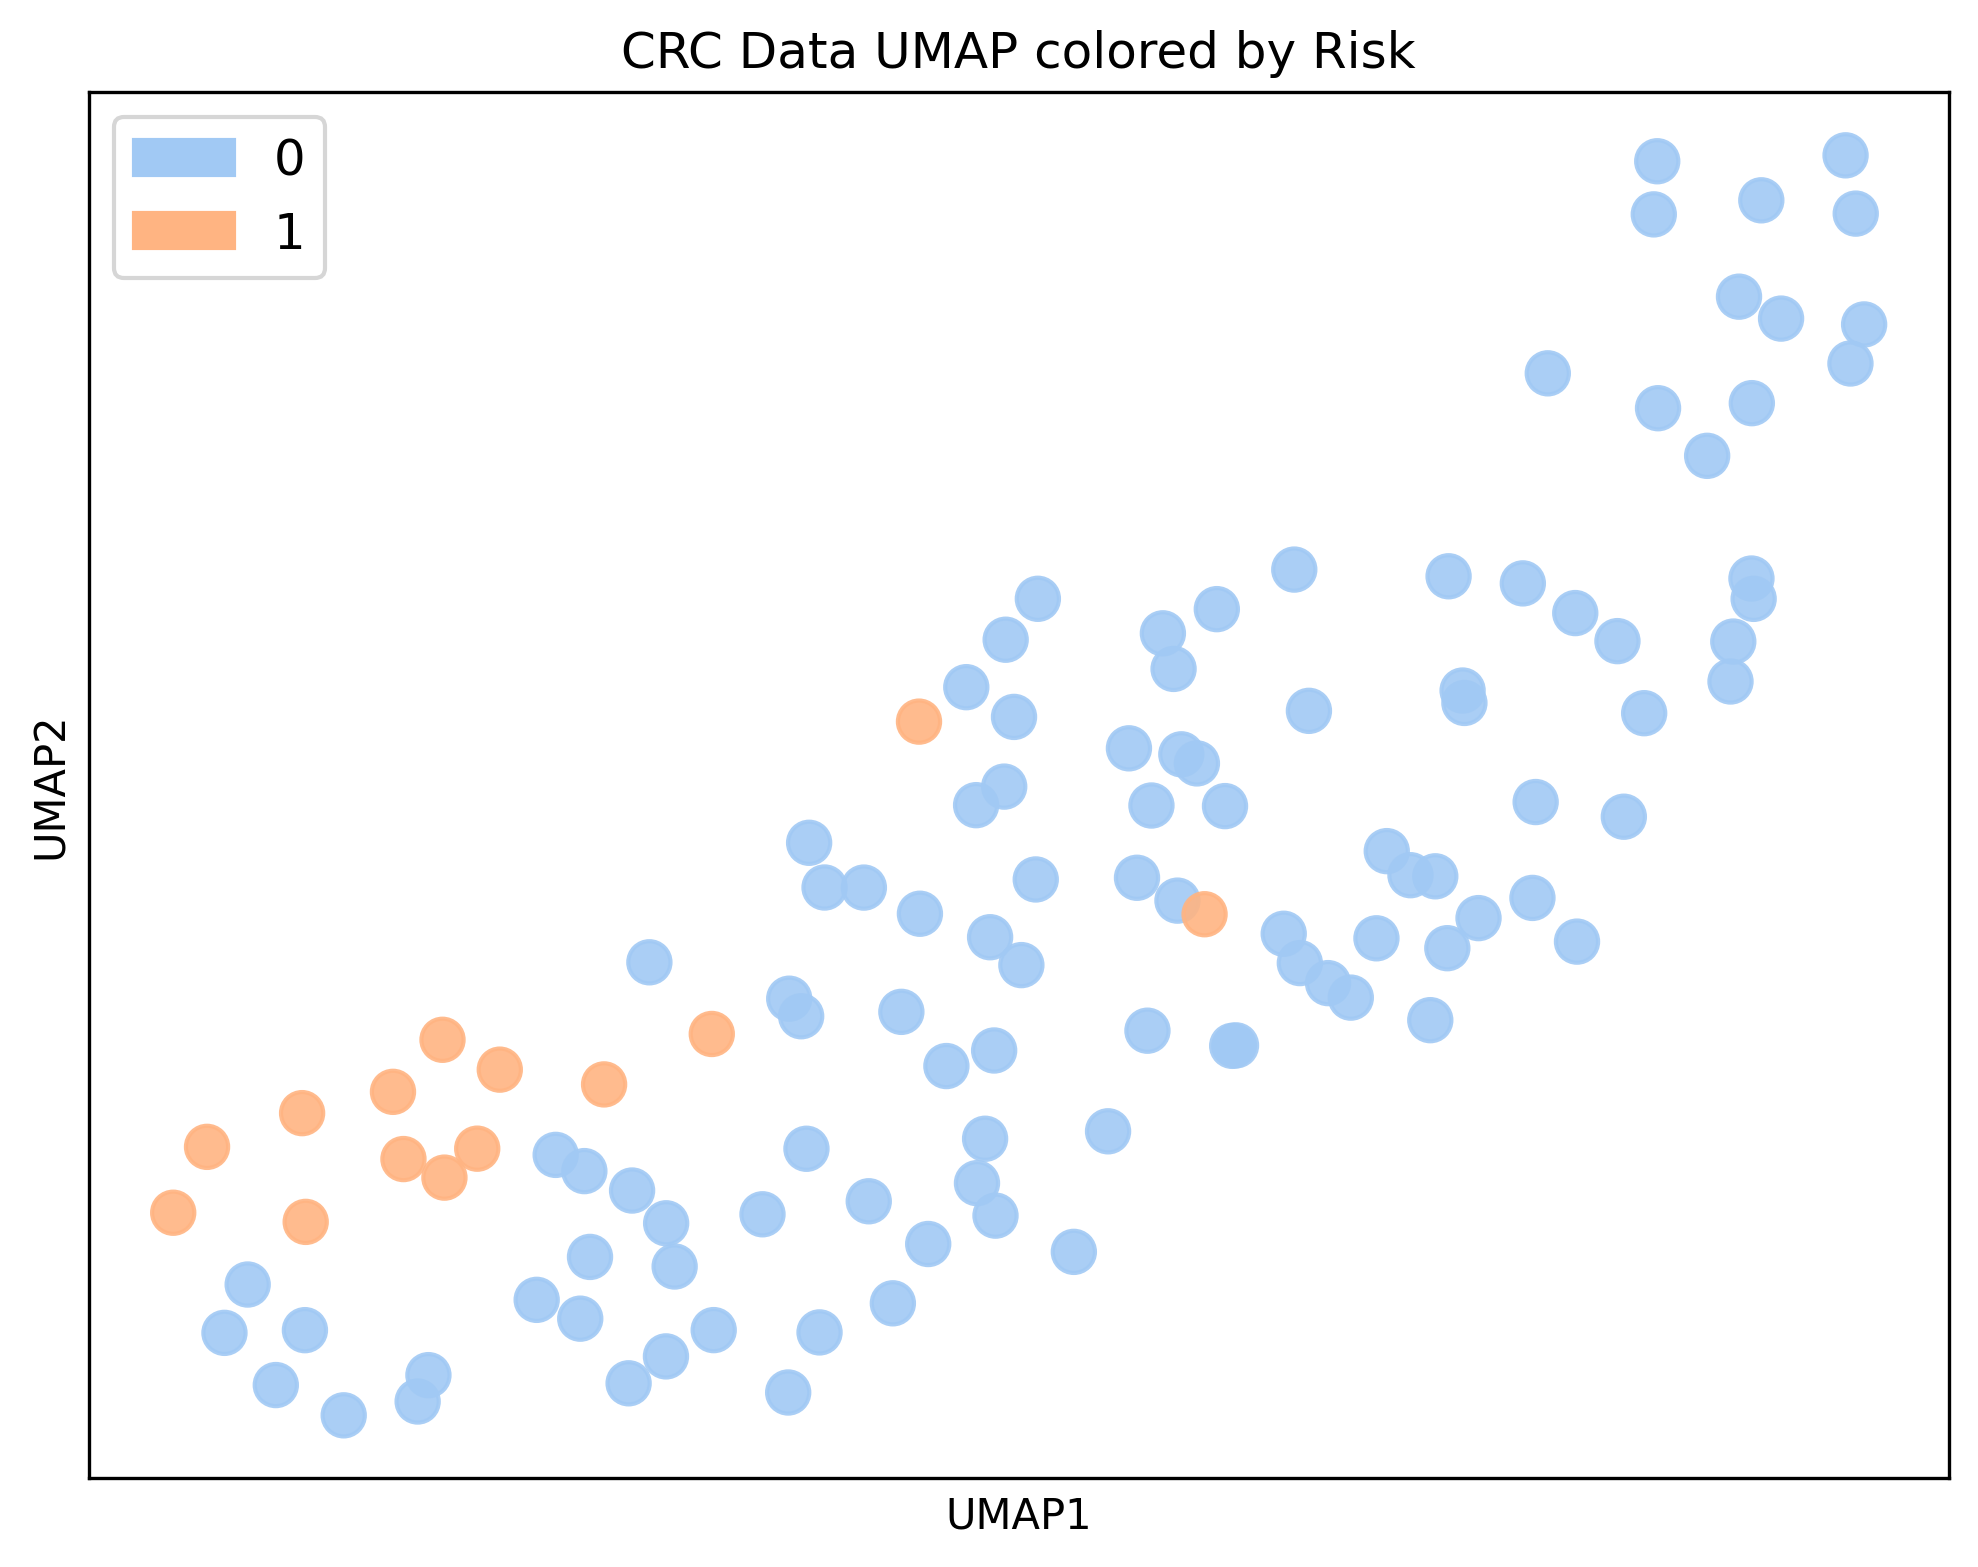

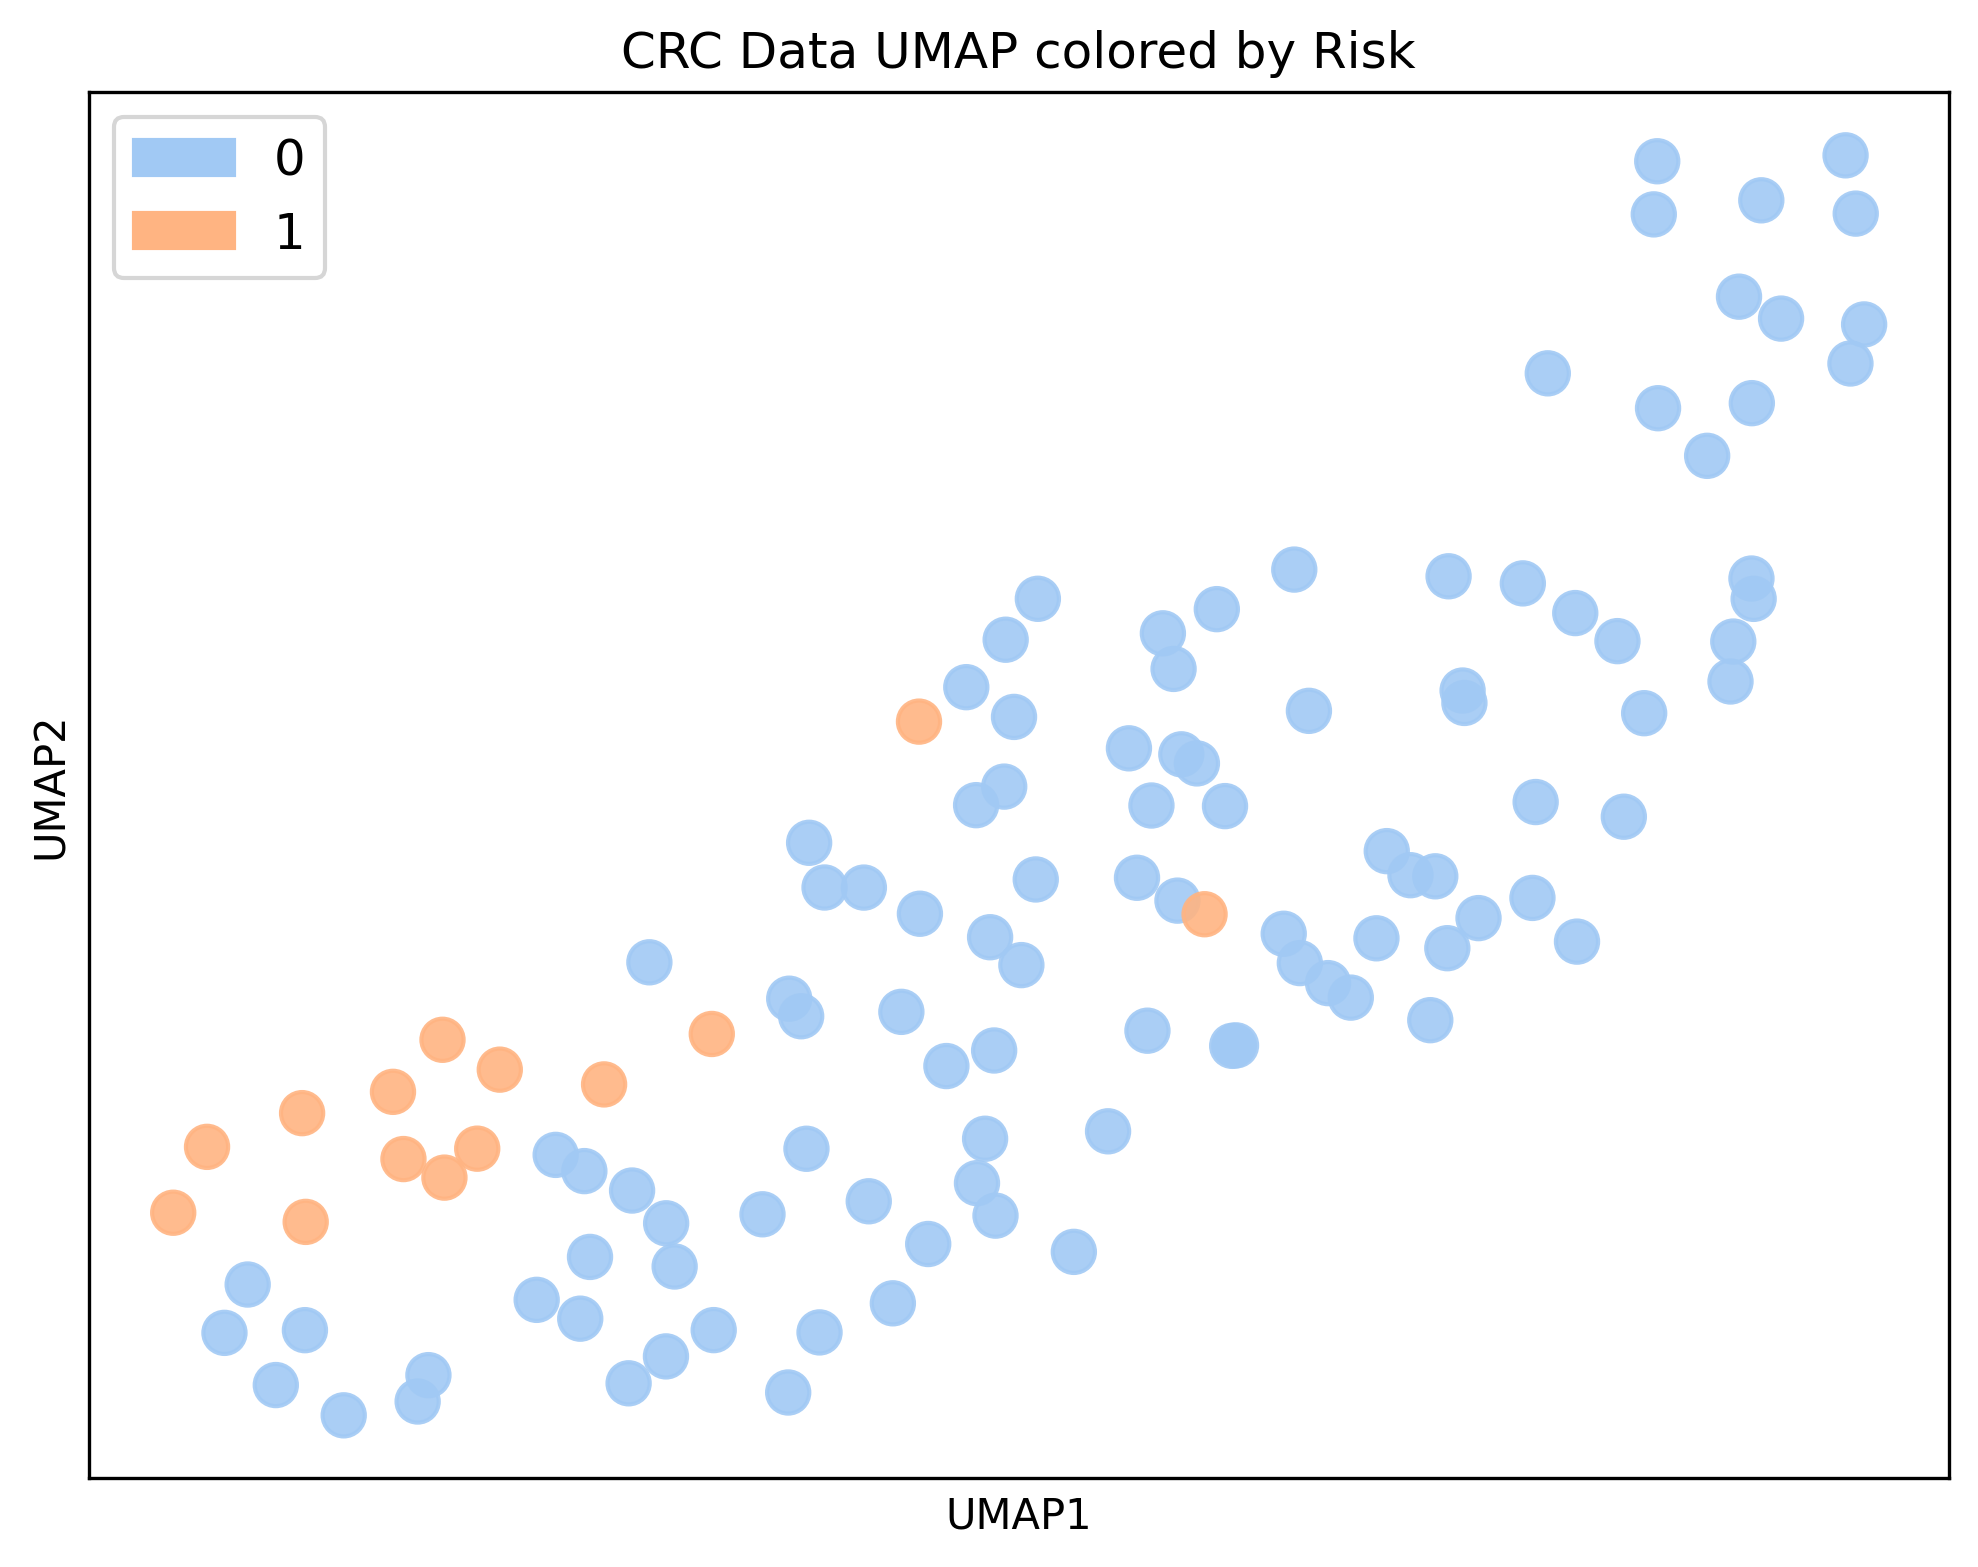

In [36]:
COLUMN_LABEL = 'y'
color_map = ListedColormap(sns.color_palette("pastel", len(collections.Counter(metadata[COLUMN_LABEL]))))

# Assuming you want to color by 'chain' and have a color map ready
plot_anndata_rep(
    a=anndata,
    color=COLUMN_LABEL,
    sort_column=COLUMN_LABEL,
    cmap=color_map,  # Example, adjust as needed
    title  = "CRC Data UMAP colored by Risk",
    direct_label=False,  # Change to True if you want direct labeling
    figsize=(8, 6),
    legend_size=12,
    fname="/home/ubuntu/CRC_Project/CRC_blood/CRC_blood_data/plots/CRC_UMAP_Risk_subject.png")

##### 3D UMAP with Desired Label

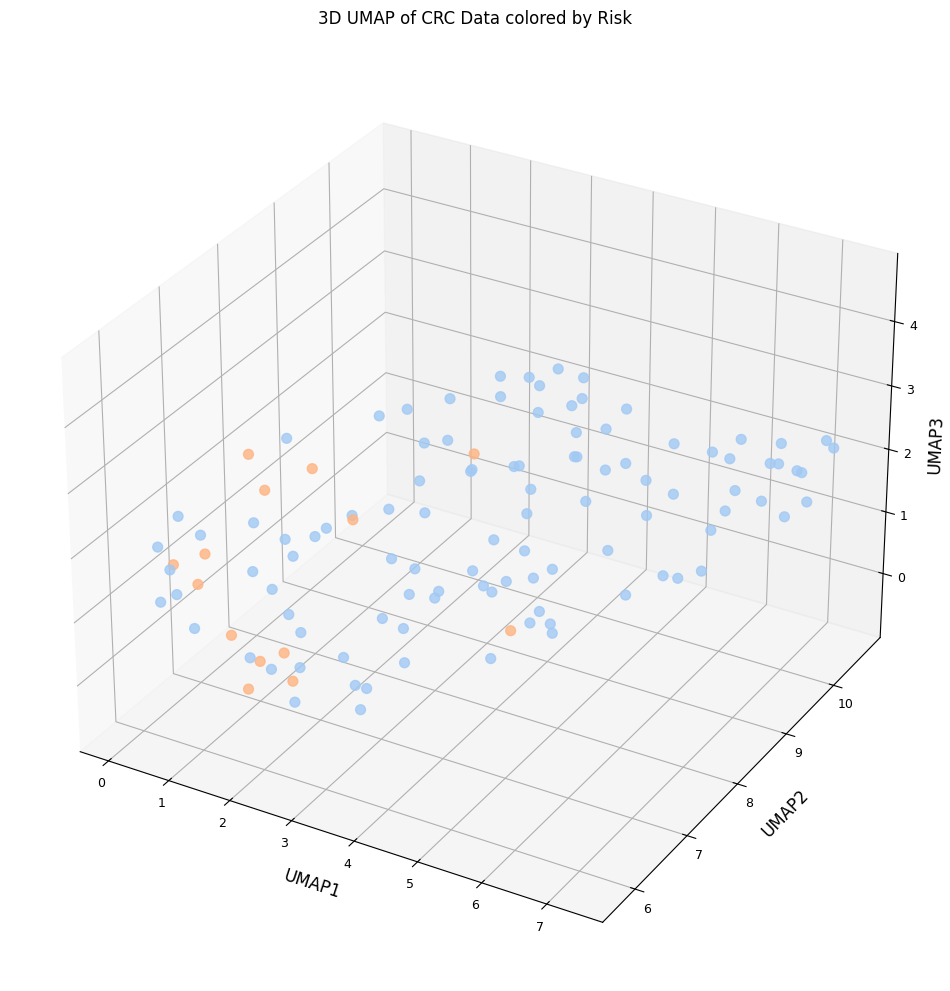

In [35]:
# Compute UMAP with 3 components
sc.pp.pca(anndata, svd_solver='arpack')
sc.pp.neighbors(anndata, n_neighbors=10, n_pcs=40)
sc.tl.umap(anndata, n_components=3)

# Define color map for your labels
COLUMN_LABEL = 'Subject'
COLOR_LABEL = 'y'

# Generate a color map based on unique values in the 'y' column
color_map = ListedColormap(sns.color_palette("pastel", len(np.unique(anndata.obs[COLOR_LABEL]))))

# Extract UMAP coordinates and colors
umap_3d = anndata.obsm['X_umap']
color_vals = anndata.obs[COLOR_LABEL]
unique_val = np.unique(color_vals.values)
color_idx = [sorted(list(unique_val)).index(i) for i in color_vals]
color_vec = [color_map(i) for i in color_idx]

# Plotting the 3D UMAP using matplotlib
fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(umap_3d[:, 0], umap_3d[:, 1], umap_3d[:, 2], c=color_vec, alpha=0.8, s=50)

#Adding labels (optional)
# for i in range(len(umap_3d)):
#     ax.text(umap_3d[i, 0], umap_3d[i, 1], umap_3d[i, 2], anndata.obs[COLUMN_LABEL].values[i], size=5, zorder=1, color='k')

# Customizing plot appearance
ax.set_xlabel('UMAP1', size=12)
ax.set_ylabel('UMAP2', size=12)
ax.set_zlabel('UMAP3', labelpad=0, size=12)
ax.set_title('3D UMAP of CRC Data colored by Risk', pad=20)

# Adjust tick label size and padding (if needed)
ax.tick_params(axis='x', labelsize=9, pad=0)
ax.tick_params(axis='y', labelsize=9, pad=0)
ax.tick_params(axis='z', labelsize=9, pad=0)

# Save the plot
plt.savefig("/home/ubuntu/CRC_Project/CRC_blood/plots/CRC_3D_UMAP_Risk_subject.png", bbox_inches='tight', dpi=1200)
plt.show()


##### 2D UMAP with Direct Label

In [ ]:
COLOR_LABEL = 'y'
COLUMN_LABEL = 'Subject'

plot_anndata_rep_direct_label(
    a=anndata,
    color=COLOR_LABEL,
    label=COLUMN_LABEL,
    sort_column=COLUMN_LABEL,
    cmap=color_map,
    title="CRC Data UMAP colored by Risk",
    direct_label=True,  # Enable direct labeling
    figsize=(8, 6),
    legend_size=7,
    fname="/home/ubuntu/CRC_Project/CRC_blood/plots/CRC_UMAP_Risk_subject_direct_label.svg"
)